<a href="https://colab.research.google.com/github/RonaldTuna/WebScraper/blob/main/X_Brands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sayari Data Task
##Context

Sayari collects public data from around the globe including: corporate registries, civil litigation registries, customs and import/export data, land and real property ownership, official gazettes, and more. This data powers our products and is leveraged for due diligence, risk management, and financial intelligence and compliance.

In order for the data to be useful, Sayari often runs entity resolution on the data we collect. This allows us to detect when a single company or person is mentioned in two different web pages. For this task you will collect some public data and perform some simple entity resolution on it.

##Task

The Secretary of State of North Dakota provides a business search web app that allows users to search for businesses by name. Your task:

    Play around with the site and figure out how to query companies by name.
        Hint: Your browser's dev tools are good for this.
    Download information for all active companies whose names start with the letter "X" (e.g., Xtreme Xteriors LLC) including their Commercial Registered Agent, Registered Agent, and/or Owners. Save the crawled data in the file format of your choice.
        Hint: scrapy is a suitable web-crawling framework.
    Create and plot a graph of the companies, registered agents, and owners.
        Hint: NetworkX is a suitable graph library that plays nice with matplotlib.
        Hint: You may consider names as sufficiently unique to identify each node in the graph.
        Hint: An example plot output is included below.

Please submit a link to a public Github repository that includes both your data and plot.
##Notes

    As of 2019/08/21 there are 193 such companies (there may be fewer). Please do not spam the web app.
    Together, using scrapy and NetworkX, your crawling and graph code should not go well beyond 100 lines of PEP8 code.


Installing required libraries

In [108]:
!pip3 install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
!pip3 install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
!pip3 install scrapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
%cd "/content/drive/MyDrive/Colab Notebooks/Data"

/content/drive/MyDrive/Colab Notebooks/Data


In [113]:
!scrapy startproject scraper

Error: scrapy.cfg already exists in /content/drive/MyDrive/Colab Notebooks/Data/scraper


In [114]:
%cd "/content/drive/MyDrive/Colab Notebooks/Data/scraper/scraper/spiders"

/content/drive/MyDrive/Colab Notebooks/Data/scraper/scraper/spiders


In [115]:
!scrapy genspider brandspider.py

Usage
=====
  scrapy genspider [options] <name> <domain>

Generate
new spider
using pre-
defined
templates

Optional Arguments
  -h, --help
    show this
    help
    message and
    exit
  -l, --list
    List
    available
    templates
  -e, --edit
    Edit spider
    after
    creating it
  -d TEMPLATE, --dump TEMPLATE
    Dump
    template to
    standard
    output
  -t TEMPLATE, --template TEMPLATE
    Uses a
    custom
    template.
  --force
    If the
    spider
    already
    exists,
    overwrite
    it with the
    template

Global Options
--------------
  --logfile FILE
    log file.
    if omitted
    stderr will
    be used
  -L LEVEL, --loglevel LEVEL
    log level
    (Default
    DEBUG)
  --nolog
    disable
    logging
    completely
  --profile FILE
    write
    python
    cProfile
    stats to
    FILE
  --pidfile FILE
    write
    process ID
    to FILE
  -s NAME=VALUE, --set NAME=VALUE
    set/overrid
    e setting
    (may be
    repeated)
  --pdb
    enable 

In [116]:
#run spider and output scraped data as x_company.json
!scrapy runspider brandspider.py -O x_company.json

2022-12-16 23:49:23 [scrapy.utils.log] INFO: Scrapy 2.7.1 started (bot: scraper)
2022-12-16 23:49:23 [scrapy.utils.log] INFO: Versions: lxml 4.9.2.0, libxml2 2.9.14, cssselect 1.2.0, parsel 1.7.0, w3lib 2.1.1, Twisted 22.10.0, Python 3.8.16 (default, Dec  7 2022, 01:12:13) - [GCC 7.5.0], pyOpenSSL 22.1.0 (OpenSSL 3.0.7 1 Nov 2022), cryptography 38.0.4, Platform Linux-5.10.133+-x86_64-with-glibc2.27
2022-12-16 23:49:23 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'scraper',
 'NEWSPIDER_MODULE': 'scraper.spiders',
 'REQUEST_FINGERPRINTER_IMPLEMENTATION': '2.7',
 'ROBOTSTXT_OBEY': True,
 'SPIDER_LOADER_WARN_ONLY': True,
 'SPIDER_MODULES': ['scraper.spiders'],
 'TWISTED_REACTOR': 'twisted.internet.asyncioreactor.AsyncioSelectorReactor'}
2022-12-16 23:49:23 [asyncio] DEBUG: Using selector: EpollSelector
2022-12-16 23:49:23 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2022-12-16 23:49:23 [scrapy.utils.log] DEBUG: Using asyncio ev

In [117]:
#import necessary libraries
import numpy as np
import pandas as pd
import scrapy
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import scipy
import matplotlib as plt

In [118]:
#Put all company info into a dataframe
df = pd.read_json('./x_company.json')

In [119]:
#remove companies that don't start with X
df = df[df['Name'].astype(str).str.startswith('X')]

In [120]:
#Use dataframe to make a graph using NetworkX
graph = nx.from_pandas_edgelist(df, 'ID', 'ID', edge_attr=True)

#itialize datastructure to hold edges
edges = set({})

#create edges based on common commercial register agents, registered agents or owners
for row in df.iterrows():
  for pointer in df.iterrows():

    #if comparing the same row, break
    if(row[1]['ID'] == pointer[1]['ID']):
      break

    #if rows have matching CRA, RA or Owner values in their columns, and that value is not 0, save the two ID's as an edge
    if (row[1]['Commercial_Registered_Agent'] == pointer[1]['Commercial_Registered_Agent']) and (row[1]['Commercial_Registered_Agent'] != 0):
       edges.add((row[1]['ID'],pointer[1]['ID']))
    if (row[1]['Registered_Agent'] == pointer[1]['Registered_Agent']) and (row[1]['Registered_Agent'] != 0):
      edges.add((row[1]['ID'],pointer[1]['ID']))
    if (row[1]['Owner'] == pointer[1]['Owner']) and (row[1]['Owner'] != 0):
      edges.add((row[1]['ID'],pointer[1]['ID']))

#add edges to graph
graph.add_edges_from(edges)


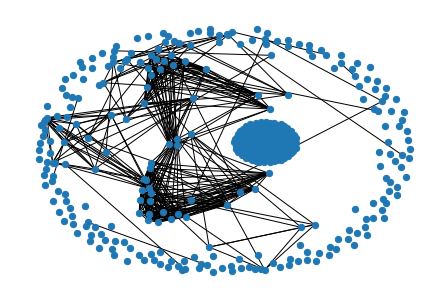

In [121]:
#because the graph has so many nodes and edges, some changes were made to make it more readable
#remove any self edges that may have made its way through the code
graph.remove_edges_from(nx.selfloop_edges(graph))

#spread out nodes more
pos = nx.spring_layout(graph, k=.6, iterations=50)

#make nodes and label fonts smaller
nx.draw(graph,pos,vmin=0.0, vmax=1.0,with_labels=False,node_size=40,font_size=8) 

#larger figure size
#plt.pyplot.figure(5,figsize=(20,20)) 

#save graph locally as a .png
plt.pyplot.savefig("X_company_graph.png", format="png")

#show graph
plt.pyplot.show(plt.pyplot.figure(1,figsize=(20,20)) )
